In [3]:
# Crafted by Collin Miller

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
from random import randint
from utils.preprocessing_utils import crop_2d
import os
import sys
import gc

In [ ]:
# Fix MSF

In [ ]:
# Add option to either load an image from the ground truth segmentations
# or label ids.

In [ ]:
# Can now download the cremi dataset from online.

In [6]:
folder = "data/train/input"

In [9]:
images = []
ground_truths = []

files = os.listdir(folder)

for i, filename in enumerate(files):
    
    sys.stdout.write("\rProgress: %.2f%% || %d/%d" % (i / len(files),
                                                      i,
                                                      len(files)))
    sys.stdout.flush()
    
    f_name, ext = os.path.splitext(filename)
    
    if "gt" in f_name.split("_"):
        continue
        
    gt_filename = f_name + "_gt"
    
    gt_path = os.path.join(folder, (gt_filename + ext))
        
    if not os.path.isfile(gt_path):
        continue    
        
    image_path = os.path.join(folder, filename)
    
    img = cv2.imread(image_path, 0)
    gt = cv2.imread(gt_path, 0)
    
    images.append(img)
    ground_truths.append(gt)
            
    gc.collect()
    
sys.stdout.write("\rProgress: Done! || %d/%d" % (len(files),
                                                len(files)))
sys.stdout.flush()

images = np.stack(images)
ground_truths = np.stack(ground_truths)

Progress: Done! || 4/4

In [11]:
images.shape

(2, 54, 132)

In [13]:
images[0]

(54, 132)

In [2]:
from datasets import cremi

In [3]:
cremi.cremi_urls

['https://cremi.org/static/data/sample_A_20160501.hdf',
 'https://cremi.org/static/data/sample_B_20160501.hdf',
 'https://cremi.org/static/data/sample_C_20160501.hdf',
 'https://cremi.org/static/data/sample_A%2B_20160601.hdf',
 'https://cremi.org/static/data/sample_B%2B_20160601.hdf',
 'https://cremi.org/static/data/sample_C%2B_20160601.hdf']

In [11]:
from datasets import datasetutils
from datasets import cremi
import os

In [10]:
cremi.cremi_urls

['https://cremi.org/static/data/sample_A_20160501.hdf',
 'https://cremi.org/static/data/sample_B_20160501.hdf',
 'https://cremi.org/static/data/sample_C_20160501.hdf',
 'https://cremi.org/static/data/sample_A%2B_20160601.hdf',
 'https://cremi.org/static/data/sample_B%2B_20160601.hdf',
 'https://cremi.org/static/data/sample_C%2B_20160601.hdf']

In [5]:
datasetutils.

In [12]:
cremi_path = "data/cremi"

if not os.path.exists(cremi_path):
    os.mkdir(cremi_path)

In [14]:
for url in cremi_urls:
    print(datasetutils.get_url_file_size(url))

175159177
167293425
173102370
150796127
151552057
151769034


In [43]:
os.path.getsize(file_name)

0

In [18]:
file_name

'data/cremi/sample_A_20160501.hdf'

In [17]:
for url in cremi_urls:
    file_name = os.path.join(cremi_path, url.split('/')[-1])
    if 
    print(datasetutils.get_url_file_size(url) == os.path.getsize(file_name))

OSError: [Errno 2] No such file or directory: 'data/cremi/sample_A_20160501.hdf'

In [4]:
size = (300, 300)

In [5]:
folder = "/home/collin/Pictures/cremi/full"

In [6]:
images = []
ground_truths = []

files = os.listdir(folder)

for i, filename in enumerate(files):
    
    sys.stdout.write("\rProgress: %.2f%% || %d/%d" % (i / len(files),
                                                      i,
                                                      len(files)))
    sys.stdout.flush()
    
    f_name, ext = os.path.splitext(filename)
    
    if "gt" in f_name.split("_"):
        continue
        
    gt_filename = f_name + "_gt"
    
    gt_path = os.path.join(folder, (gt_filename + ext))
        
    if not os.path.isfile(gt_path):
        continue    
        
    image_path = os.path.join(folder, filename)
    
    img = cv2.imread(image_path, 0)
    gt = cv2.imread(gt_path, 0)
    
    for x in range(img.shape[0] // size[0]):
        for y in range(img.shape[1] // size[1]):
            tl_corner = (x*size[0], y*size[1])
            images.append(crop_2d(img, tl_corner, size[0], size[1]))
            ground_truths.append(crop_2d(gt, tl_corner, size[0], size[1]))
            
    gc.collect()
    
sys.stdout.write("\rProgress: Done! || %d/%d" % (len(files),
                                                len(files)))
sys.stdout.flush()

images = np.stack(images)
ground_truths = np.stack(ground_truths)

Progress: Done! || 250/250

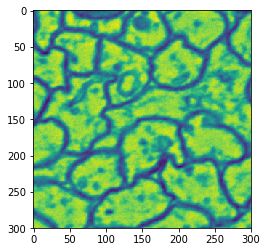

In [7]:
plt.imshow(images[110])

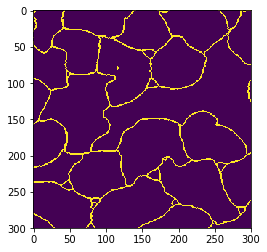

In [8]:
plt.imshow(ground_truths[110])